In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# load the data
df_original = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv')

In [5]:
# sample 10000 instances of the data
df = df_original.sample(n = 10000)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2646478,177567,2013-06-22 19:54:44,5,219,NaN,NaN,219,57845,4,4.0,1,0.69,NaN,0.00,20,227.00,0,12755,1,23,2,0,1,0,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3644556,244843,2013-03-25 06:32:58,9,59,NaN,NaN,59,98893,3,4.5,0,3.40,0.0991,4.40,3,64.78,1,16770,1,0,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1715330,115232,2013-01-30 18:12:29,5,219,NaN,NaN,31,37252,0,0.0,0,0.69,NaN,4.58,20,79.00,0,15620,10,57,2,0,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4634734,310903,2013-01-23 18:34:27,5,219,NaN,NaN,219,99482,3,4.5,1,2.30,NaN,4.97,25,169.00,0,24366,1,1,2,0,1,1,NaN,4.62,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1969298,132235,2012-11-16 13:38:23,7,129,NaN,NaN,100,123898,5,4.5,1,4.16,NaN,6.21,34,424.49,0,6776,1,36,2,0,1,1,NaN,4121.95,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [6]:
# the shape of the data
print("the shape of the data ",df.shape)
# the name of the columns
print(df.columns)
# data type
# print(df.dtypes)

the shape of the data  (10000, 54)
Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'com

In [7]:
# Check for missing values
df.isnull().sum(axis = 0)

srch_id                           0
date_time                         0
site_id                           0
visitor_location_country_id       0
visitor_hist_starrating        9481
visitor_hist_adr_usd           9478
prop_country_id                   0
prop_id                           0
prop_starrating                   0
prop_review_score                20
prop_brand_bool                   0
prop_location_score1              0
prop_location_score2           2218
prop_log_historical_price         0
position                          0
price_usd                         0
promotion_flag                    0
srch_destination_id               0
srch_length_of_stay               0
srch_booking_window               0
srch_adults_count                 0
srch_children_count               0
srch_room_count                   0
srch_saturday_night_bool          0
srch_query_affinity_score      9345
orig_destination_distance      3220
random_bool                       0
comp1_rate                  

<AxesSubplot:>

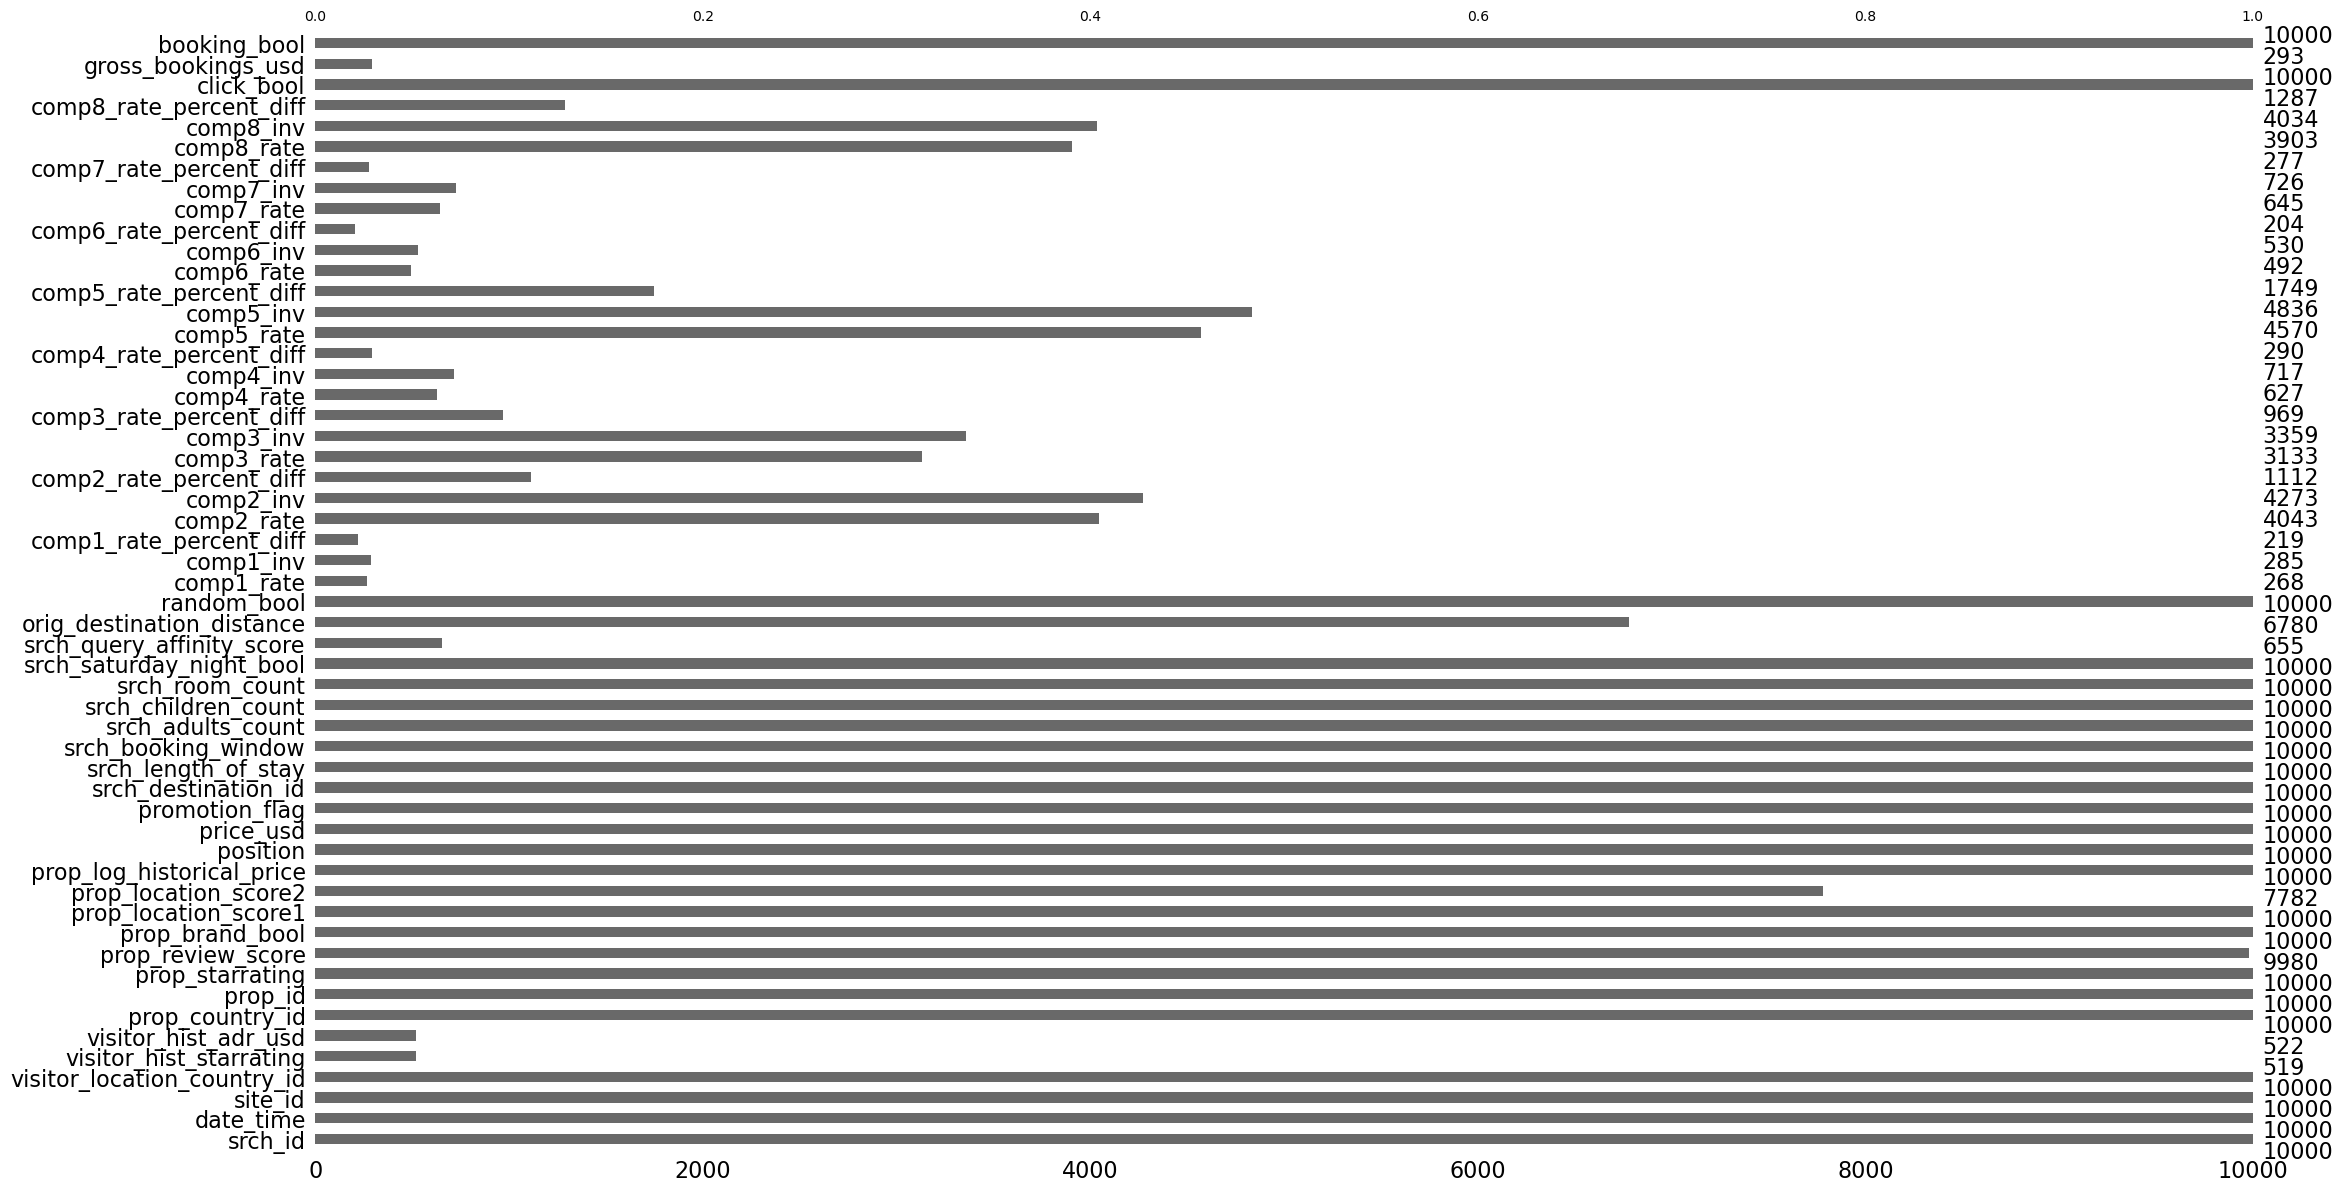

In [8]:
import missingno as msno
# visualize the missing values
msno.bar(df)

In [9]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,10000.000000,10000.000000,10000.000000,519.000000,522.000000,10000.000000,10000.000000,10000.000000,9980.000000,10000.000000,10000.000000,7782.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,655.000000,6780.000000,10000.000000,268.000000,285.000000,219.000000,4043.000000,4273.000000,1112.000000,3133.000000,3359.000000,969.00000,627.000000,717.000000,290.000000,4570.000000,4836.000000,1749.000000,492.000000,530.000000,204.000000,645.000000,726.000000,277.000000,3903.000000,4034.000000,1287.000000,10000.000000,293.000000,10000.000000
mean,166430.157100,9.900200,175.921000,3.358632,171.988448,174.589800,70081.594500,3.177100,3.782265,0.643000,2.863544,0.129503,4.319213,16.773900,7.820052e+02,0.214000,14052.508400,2.359200,36.814800,1.949600,0.366500,1.101700,0.505200,-24.884193,1264.126280,0.298100,0.518657,0.021053,255.031963,0.043285,0.043529,17.188849,0.010214,0.054481,16.49742,-0.044657,0.103208,19.958621,0.014223,0.048594,17.528874,0.150407,0.056604,18.004902,0.164341,0.059229,18.361011,-0.070202,0.012890,14.142191,0.046900,393.178771,0.029300
std,96018.351223,7.581833,65.668682,0.713652,101.128585,68.047172,40404.990463,1.064166,1.044930,0.479139,1.512387,0.157669,1.824922,10.359532,5.077931e+04,0.410147,8189.776184,2.040488,51.925958,0.821905,0.754211,0.377586,0.499998,15.738327,2013.765242,0.457447,0.632771,0.204472,1154.952779,0.450253,0.239920,20.654858,0.469257,0.287226,17.92991,0.596515,0.351300,53.149313,0.528065,0.261085,18.983701,0.568827,0.282782,26.479753,0.558085,0.302753,23.377487,0.477791,0.197511,10.941701,0.211435,517.826098,0.168655
min,81.000000,1.000000,2.000000,1.500000,8.460000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-155.103100,0.020000,0.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.00000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,28.910000,0.000000
25%,84118.000000,5.000000,100.000000,2.910000,106.022500,100.000000,35258.750000,3.000000,3.500000,0.000000,1.790000,0.019900,4.440000,8.000000,8.500000e+01,0.000000,6948.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,-32.470150,135.962500,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.00000,0.000000,0.000000,8.000000,0.000000,0.000000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,131.940000,0.000000
50%,166623.000000,5.000000,219.000000,3.420000,146.375000,219.000000,69864.000000,3.000000,4.000000,1.000000,2.770000,0.069500,4.910000,16.000000,1.210000e+02,0.000000,13687.000000,2.000000,16.000000,2.000000,0.000000,1.000000,1.000000,-20.742000,363.965000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.00000,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,13.

In [10]:
# Check the distribution of the booking_bool variable
df['booking_bool'].value_counts()

0    9707
1     293
Name: booking_bool, dtype: int64

In [11]:
# Check the distribution of the click_bool variable
df['click_bool'].value_counts()

0    9531
1     469
Name: click_bool, dtype: int64

In [12]:
# Check the distribution of the visitor_location_country_id 
print(df['visitor_location_country_id'].value_counts().head())

219    5872
100     957
55      582
216     453
220     339
Name: visitor_location_country_id, dtype: int64


In [13]:
# Check the distribution of the visitor_hist_starrating 
print(df['visitor_hist_starrating'].value_counts())


4.00    49
3.00    42
3.50    34
2.50    23
2.00    19
        ..
4.15     1
4.94     1
2.70     1
3.26     1
2.36     1
Name: visitor_hist_starrating, Length: 180, dtype: int64


In [14]:
# average visitor_hist_starrating for each srch_id.
df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna()
# df.groupby('srch_id')['visitor_hist_starrating'].mean()

srch_id
387       2.90
909       4.94
1253      2.33
2846      3.43
3574      2.63
          ... 
328090    3.50
328091    4.46
330406    2.56
332137    3.44
332500    3.92
Name: visitor_hist_starrating, Length: 506, dtype: float64

In [15]:
df.groupby('srch_id')['visitor_location_country_id'].mean().dropna()

srch_id
81        219.0
175       100.0
203       219.0
268        73.0
338       219.0
          ...  
332607     99.0
332663    100.0
332708    100.0
332730     59.0
332765    220.0
Name: visitor_location_country_id, Length: 9741, dtype: float64

Text(0, 0.5, 'Price')

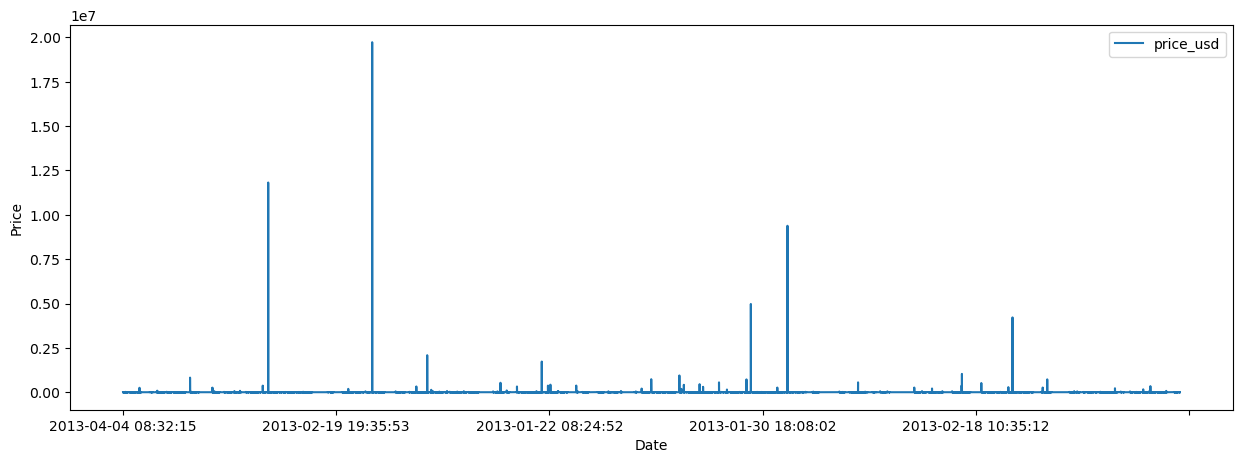

In [16]:
df_original.plot(x='date_time',y='price_usd',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Price')
# plt.title("Time Series Graph Of Price Of Room Based on Date-Time")

In [17]:
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2646478,177567,2013-06-22 19:54:44,5,219,NaN,NaN,219,57845,4,4.0,1,0.69,NaN,0.00,20,227.00,0,12755,1,23,2,0,1,0,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3644556,244843,2013-03-25 06:32:58,9,59,NaN,NaN,59,98893,3,4.5,0,3.40,0.0991,4.40,3,64.78,1,16770,1,0,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1715330,115232,2013-01-30 18:12:29,5,219,NaN,NaN,31,37252,0,0.0,0,0.69,NaN,4.58,20,79.00,0,15620,10,57,2,0,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4634734,310903,2013-01-23 18:34:27,5,219,NaN,NaN,219,99482,3,4.5,1,2.30,NaN,4.97,25,169.00,0,24366,1,1,2,0,1,1,NaN,4.62,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1969298,132235,2012-11-16 13:38:23,7,129,NaN,NaN,100,123898,5,4.5,1,4.16,NaN,6.21,34,424.49,0,6776,1,36,2,0,1,1,NaN,4121.95,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713429,115094,2013-01-10 08:53:08,5,219,NaN,NaN,219,14024,4,4.5,1,3.74,0.1002,5.34,6,149.00,0,13870,1,1,4,0,1,1,NaN,61.85,0,NaN,NaN,NaN,-1.0,0.0,14.0,-1.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,14.0,0,NaN,0
2891189,194191,2013-04-01 12:05:56,5,219,NaN,NaN,219,47278,2,3.5,0,0.69,NaN,4.78,36,99.00,0,25789,1,10,2,0,1,1,NaN,136.24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1506024,101001,2013-05-17 14:37:12,5,219,NaN,NaN,219,21180,3,5.0,1,1.10,0.6099,4.54,3,85.00,0,8661,1,0,1,0,1,1,NaN,231.83,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2511042,168587,2013-03-29 17:03:38,5,219,NaN,NaN,219,41263,2,3.5,1,2.40,NaN,4.51,29,77.00,0,278,3,19,2,0,1,0,NaN,193.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


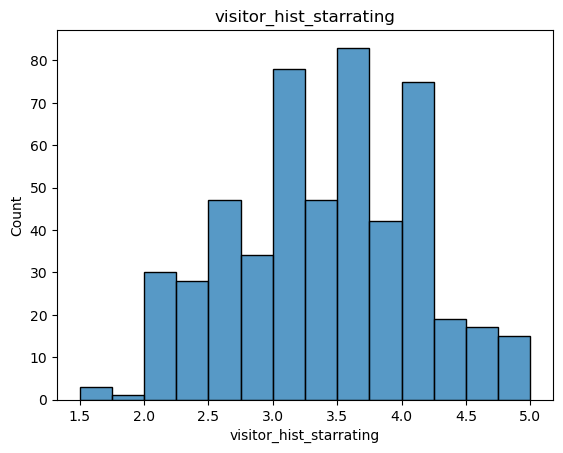

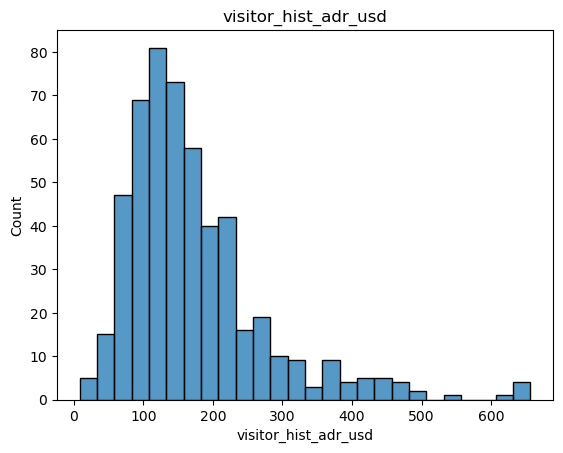

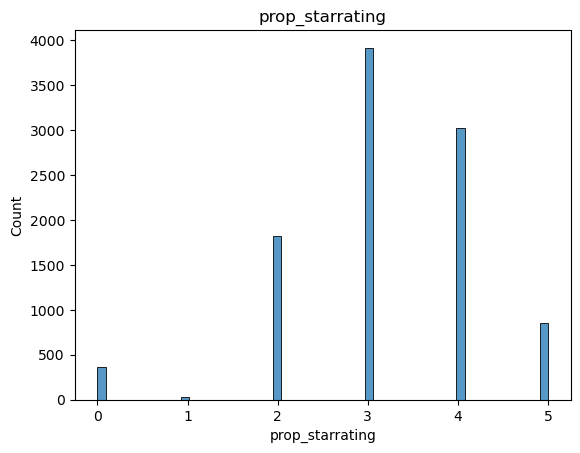

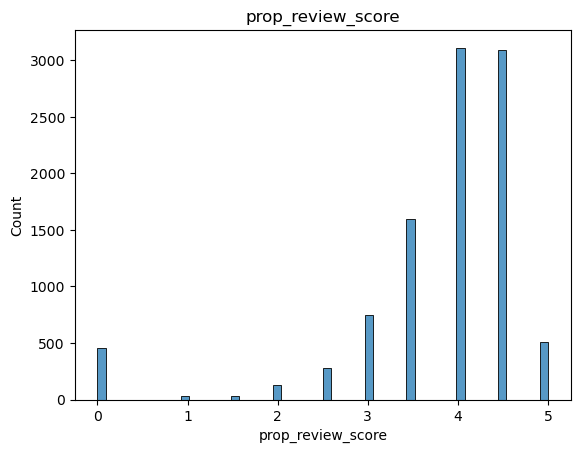

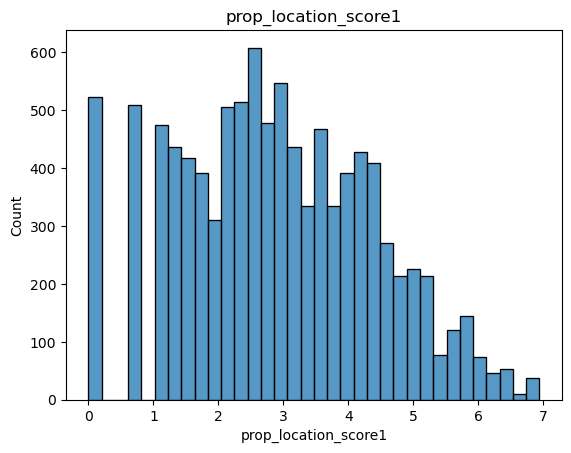

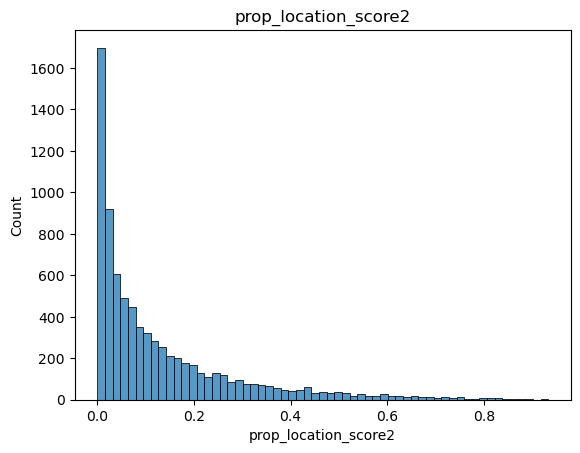

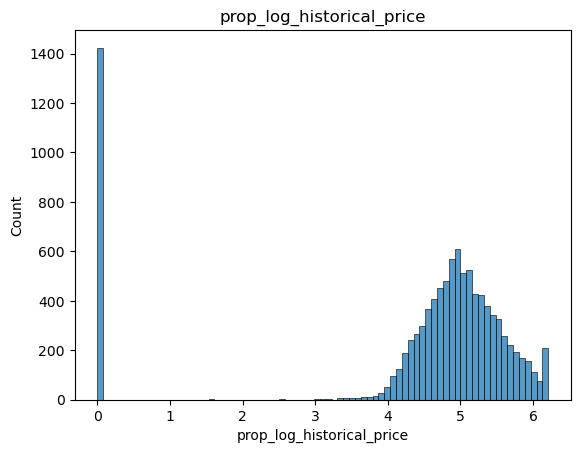

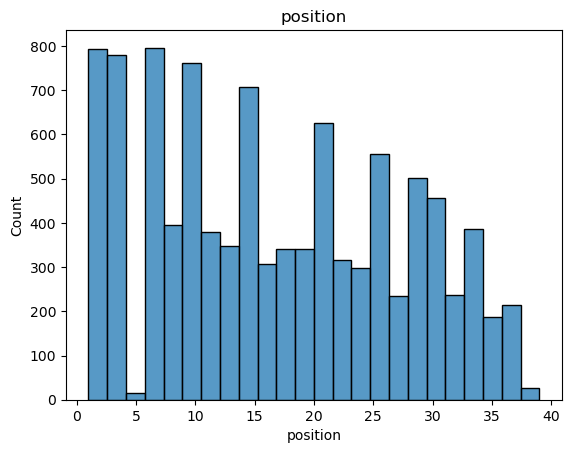

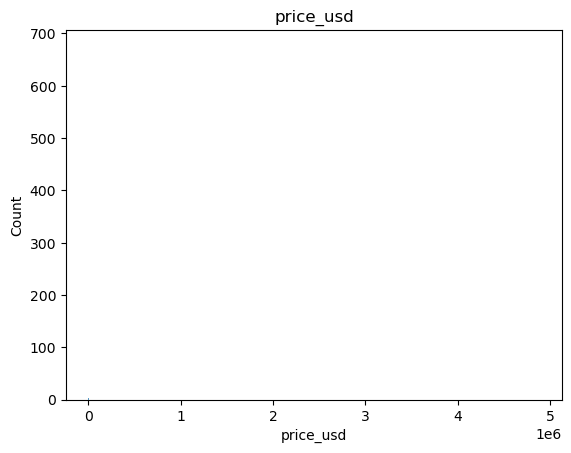

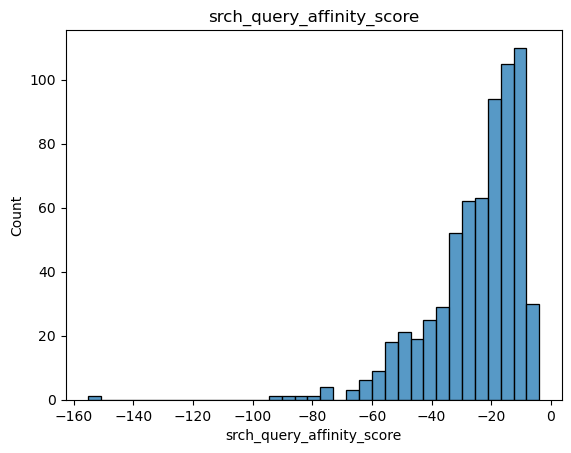

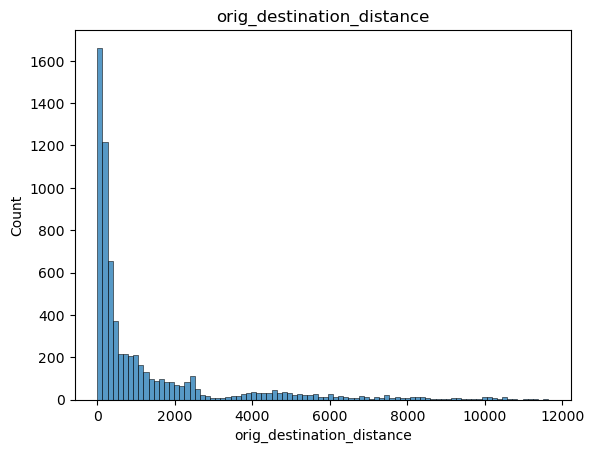

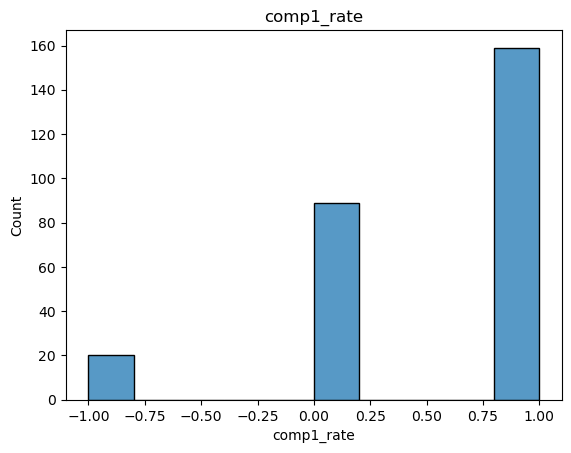

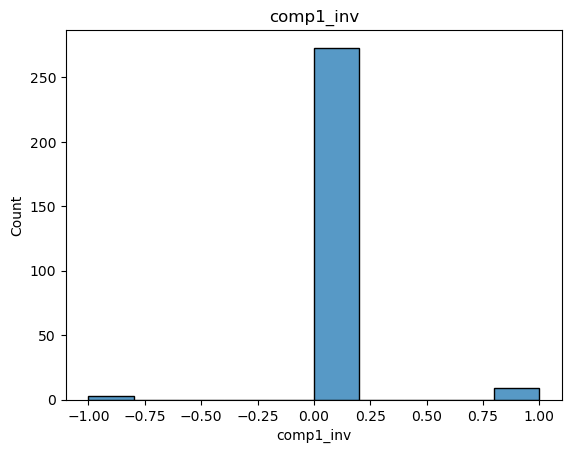

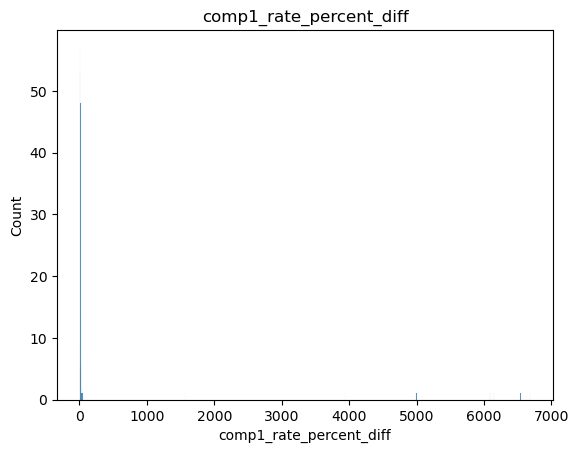

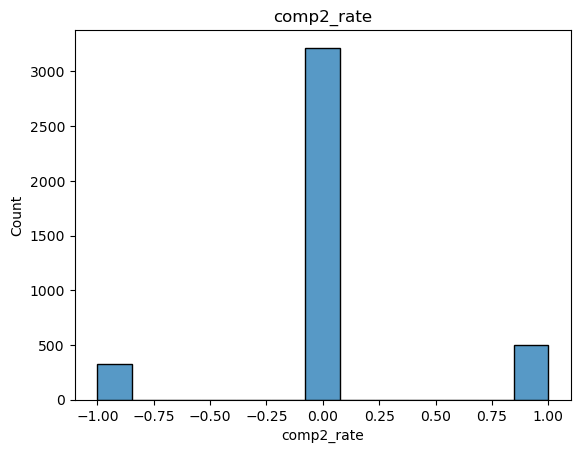

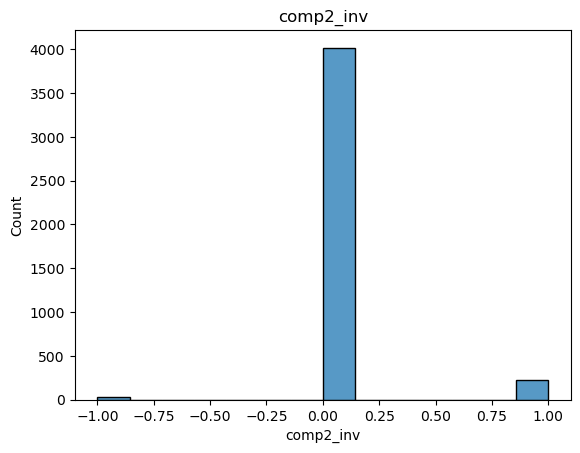

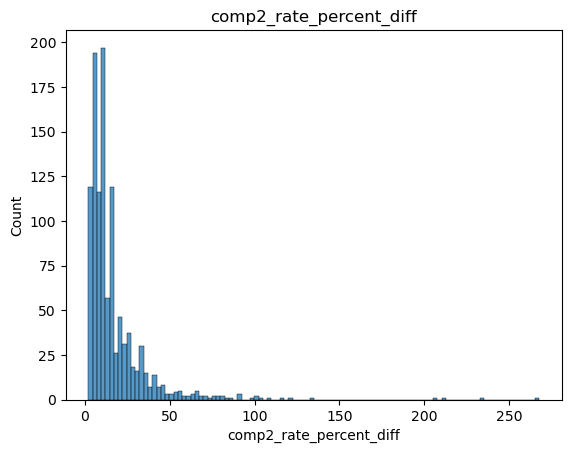

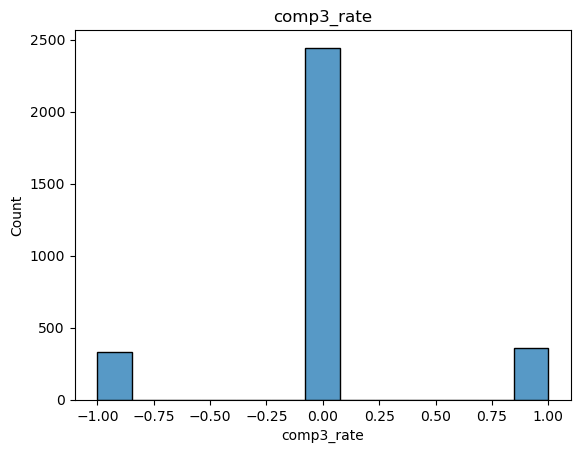

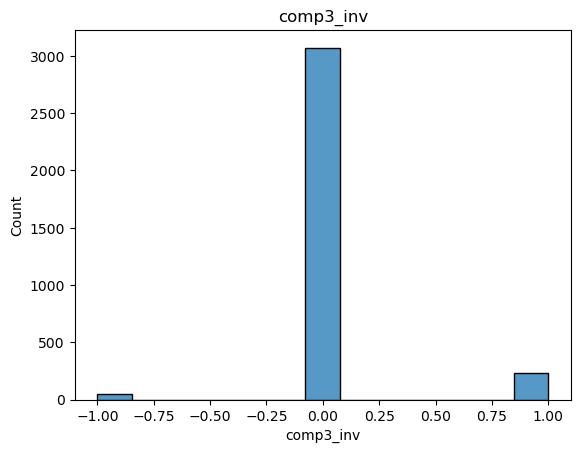

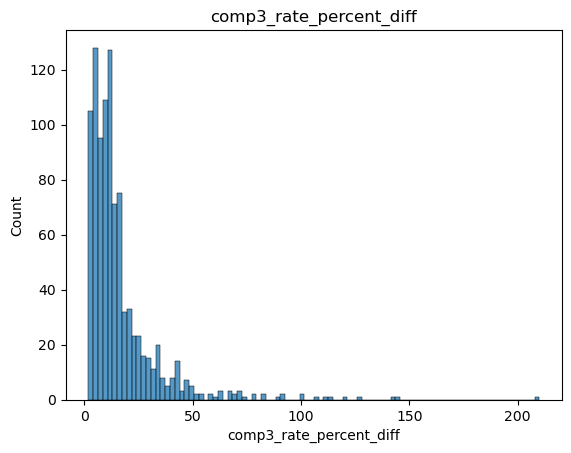

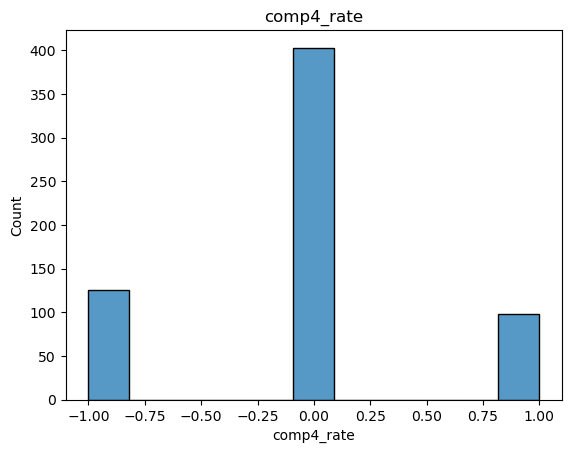

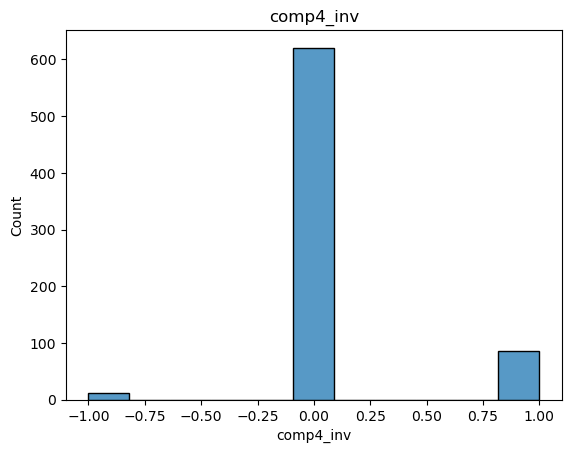

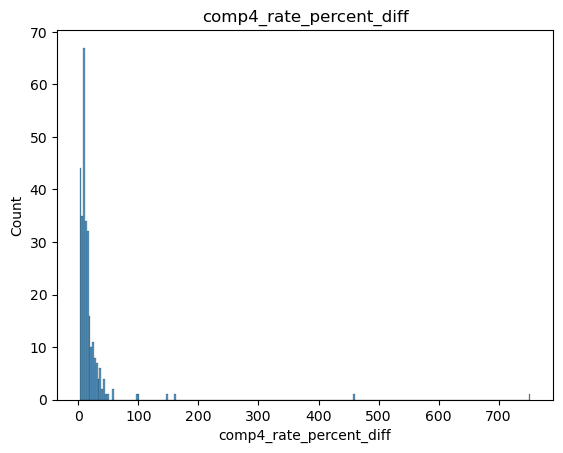

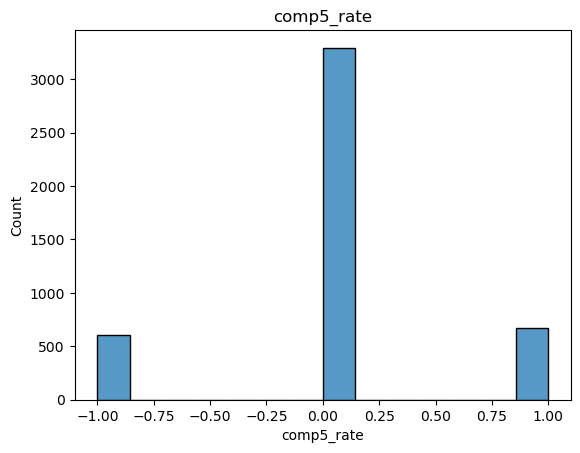

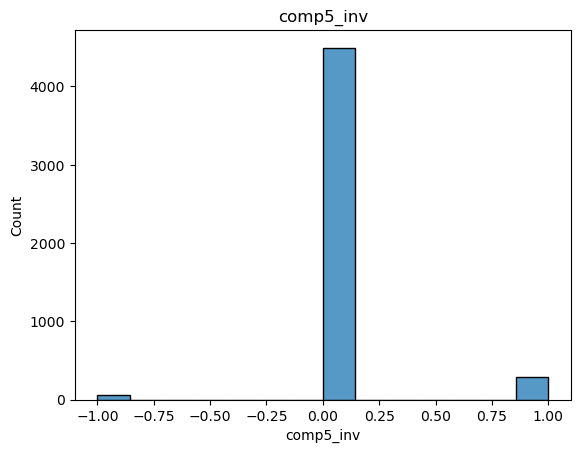

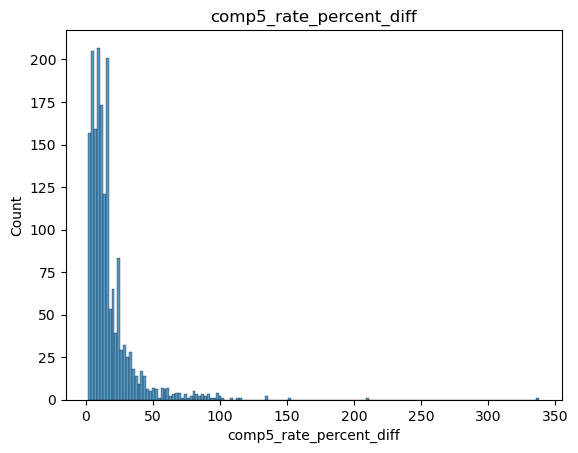

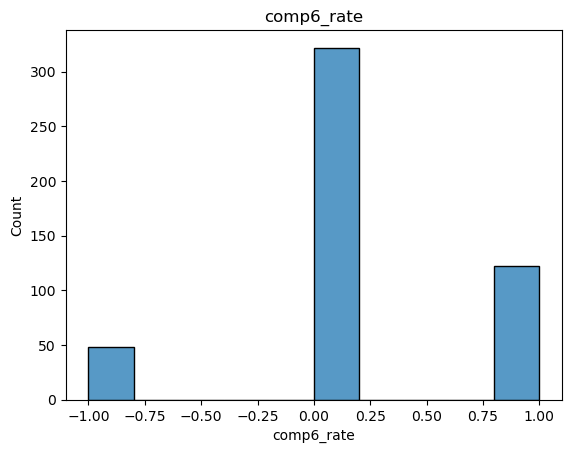

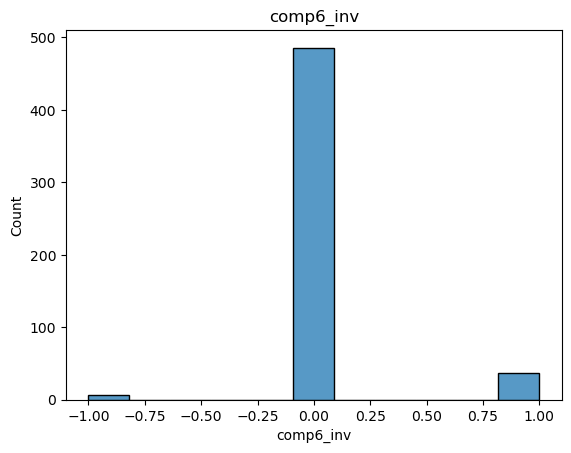

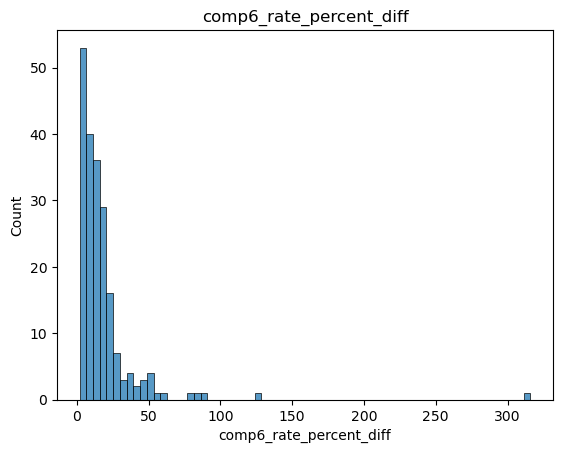

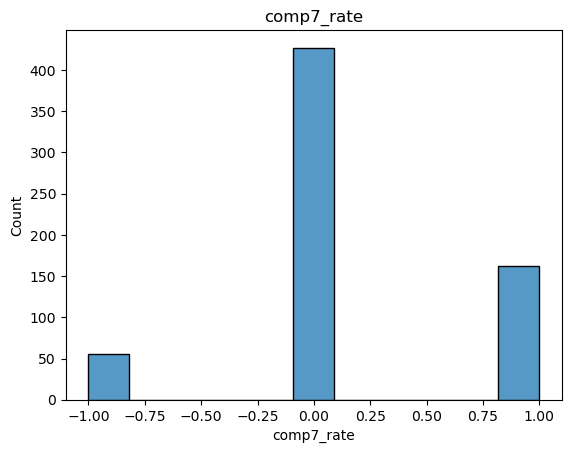

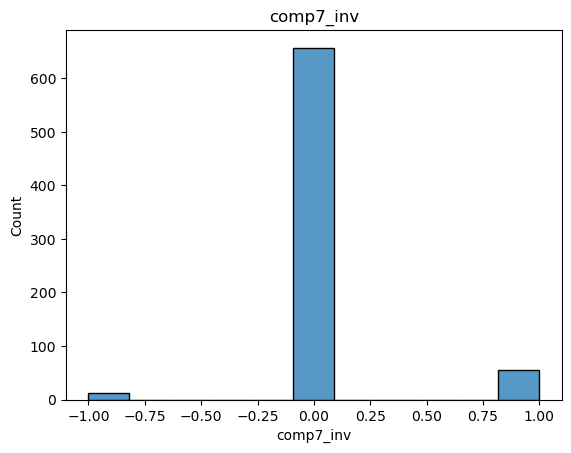

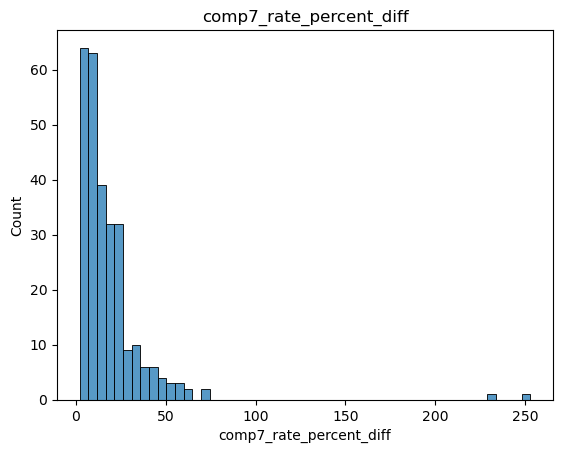

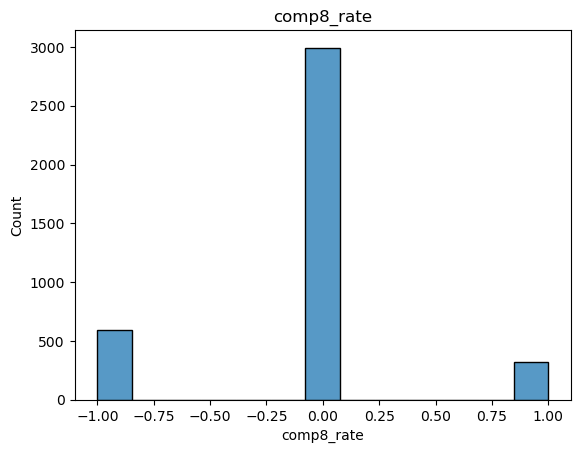

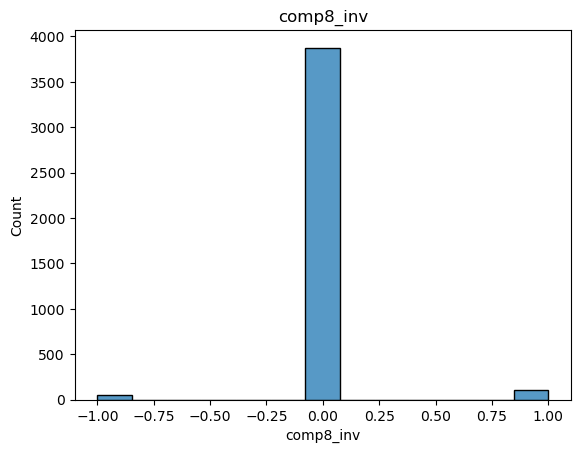

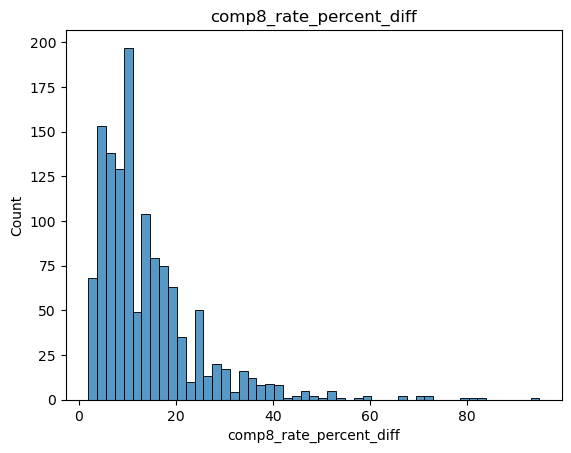

In [18]:
# Visualize the distribution of numerical features
num_features = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'srch_query_affinity_score', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff']
for feature in num_features:
    sns.histplot(df[feature], kde=False)
    plt.title(feature)
    plt.show()

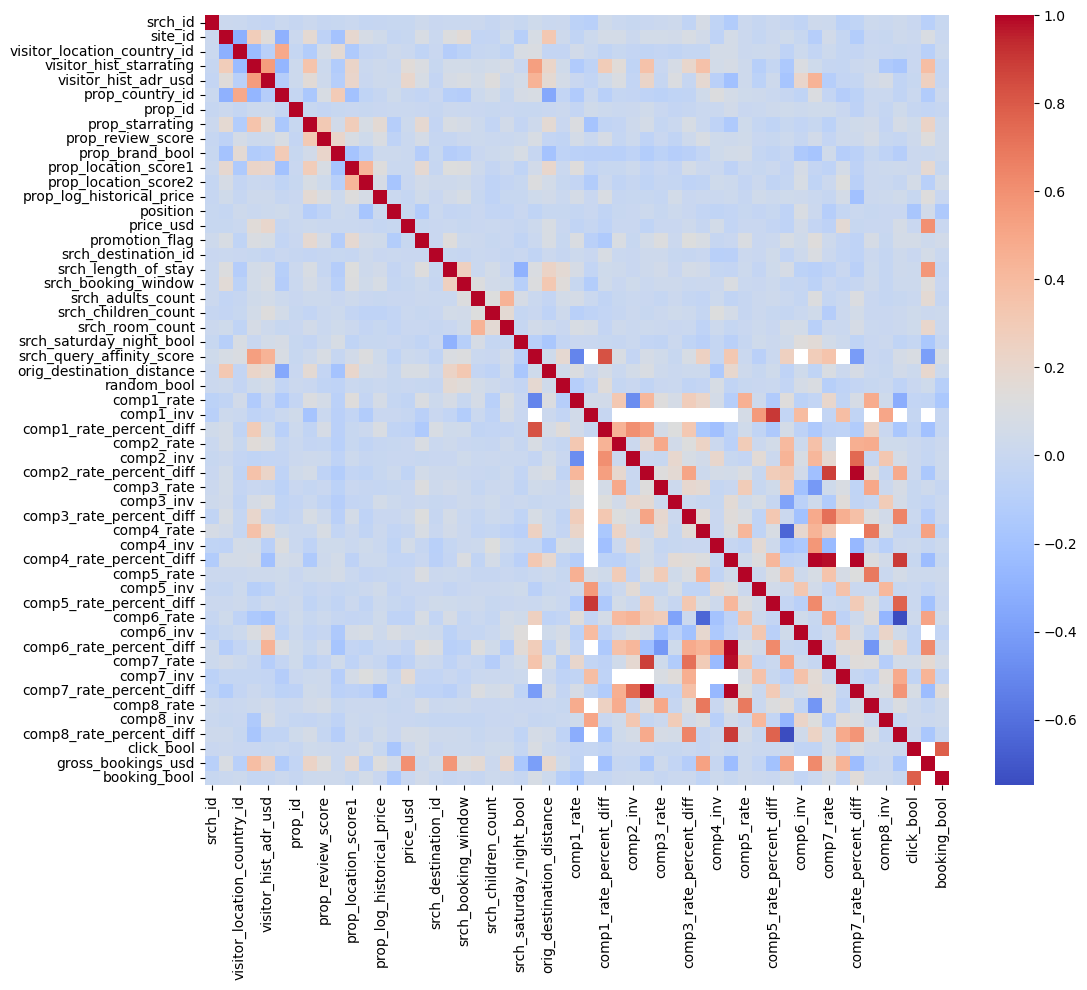

In [19]:
# Visualize the correlation between features
# Create a correlation matrix
corr = df.corr()
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))
# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', ax=ax)
# Show the plot
plt.show()

In [20]:
# # Identify the missing data points
# missing_data = df.isnull()

# # For each missing data point, determine the country it is located in
# for column in missing_data.columns:
#     # Check if the column contains missing values
#     if missing_data[column].any():
#         # Identify the row and column of the missing data point
#         row_index, column_index = np.where(missing_data)

#         # Determine the country for the missing data point
#         country = df.iloc[row_index]["visitor_location_country_id"]
#         # Get the first (and only) value in the series
#         country = country.iloc[0]

#         # Calculate the first quartile for the country
#         country_data = df.loc[df["visitor_location_country_id"] == country, df.columns[column_index[0]]]
#         # Calculate the first quartile for the non-nan values in the column
#         first_quartile = np.nanpercentile(country_data, 25)
#         print(first_quartile)
#         # Replace the missing values with the first quartile
#         df.loc[missing_data[column], column] = first_quartile


In [21]:

# drop unnecessary columns
# data = df_original

data = df
data = data.drop(['srch_id', 'site_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd',
                   'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff',
                  'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
                  'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff',
                  'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
                  'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
                  'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'gross_bookings_usd'], axis=1)

# convert date_time to year, month, day, and hour
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hour'] = data['date_time'].dt.hour
data = data.drop('date_time', axis=1)

# # fill missing values with mean
# data['prop_review_score'] = data['prop_review_score'].fillna(data['prop_review_score'].mean())

# create new features
data['log_price_diff'] = data['prop_log_historical_price'] - np.log(data['price_usd']+1)
data['price_rank'] = data.groupby('prop_id')['price_usd'].rank(method='dense')

data['star_rank'] = data.groupby('visitor_location_country_id')['prop_starrating'].rank(method='dense', ascending=False)

# Calculate average price by country and star rating
avg_price = data.groupby(['prop_country_id', 'prop_starrating'])['price_usd'].transform('mean')
# Calculate price difference and Add price difference as a new feature
data['price_diff'] = data['price_usd'] - avg_price


# To combine the prop_location_score1 and prop_location_score2 columns to create a new feature that captures 
# the overall location score of the hotel, we can simply add these two columns
data['location_score'] = data['prop_location_score1'] + data['prop_location_score2']


# data = data.astype('float64')


# # Create a list of all the competitor rate columns
# comp_rates = [col for col in data.columns if 'comp' in col and '_rate' in col]
# # Create a new feature that counts the number of competitors with a lower price
# data['num_lower_price_competitors'] = (data[comp_rates] < data['price_usd']).sum(axis=1)

# # Create a new feature that calculates the average rating of competitors
# comp_ratings = [col for col in data.columns if 'comp' in col and '_rate' not in col]
# data['avg_comp_rating'] = data[comp_ratings].mean(axis=1)


# # one-hot encoding categorical variables
# data = pd.get_dummies(data, columns=['prop_country_id', 'prop_brand_bool', 'srch_saturday_night_bool'])

# # normalize numerical features
# data[['prop_review_score', 'prop_location_score1', 'orig_destination_distance']] = \
#     (data[['prop_review_score', 'prop_location_score1', 'orig_destination_distance']] - 
#      data[['prop_review_score', 'prop_location_score1', 'orig_destination_distance']].mean()) / \
#     data[['prop_review_score', 'prop_location_score1', 'orig_destination_distance']].std()

# # target variable
# target = data['booking_bool']

# # drop target variable and irrelevant features
# data = data.drop(['booking_bool', 'click_bool', 'position'], axis=1)

# print the first 5 rows of the preprocessed dataset
data.head()


,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,click_bool,booking_bool,year,month,day,hour,log_price_diff,price_rank,star_rank,price_diff,location_score
2646478,219,219,57845,4,4.0,1,0.69,NaN,0.00,20,227.00,0,12755,1,23,2,0,1,0,NaN,NaN,1,0,0,2013,6,22,19,-5.429346,1.0,2.0,15.946448,NaN
3644556,59,59,98893,3,4.5,0,3.40,0.0991,4.40,3,64.78,1,16770,1,0,2,0,1,0,NaN,NaN,0,0,0,2013,3,25,6,0.213684,1.0,3.0,-13.913836,3.4991
1715330,219,31,37252,0,0.0,0,0.69,NaN,4.58,20,79.00,0,15620,10,57,2,0,1,0,NaN,NaN,1,0,0,2013,1,30,18,0.197973,1.0,6.0,-59.042593,NaN
4634734,219,219,99482,3,4.5,1,2.30,NaN,4.97,25,169.00,0,24366,1,1,2,0,1,1,NaN,4.62,0,0,0,2013,1,23,18,-0.165798,1.0,3.0,-494.516175,NaN
1969298,129,100,123898,5,4.5,1,4.16,NaN,6.21,34,424.49,0,6776,1,36,2,0,1,1,NaN,4121.95,0,0,0,2012,11,16,13,0.156759,1.0,1.0,139.620769,NaN


In [22]:
data

,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,click_bool,booking_bool,year,month,day,hour,log_price_diff,price_rank,star_rank,price_diff,location_score
2646478,219,219,57845,4,4.0,1,0.69,NaN,0.00,20,227.00,0,12755,1,23,2,0,1,0,NaN,NaN,1,0,0,2013,6,22,19,-5.429346,1.0,2.0,15.946448,NaN
3644556,59,59,98893,3,4.5,0,3.40,0.0991,4.40,3,64.78,1,16770,1,0,2,0,1,0,NaN,NaN,0,0,0,2013,3,25,6,0.213684,1.0,3.0,-13.913836,3.4991
1715330,219,31,37252,0,0.0,0,0.69,NaN,4.58,20,79.00,0,15620,10,57,2,0,1,0,NaN,NaN,1,0,0,2013,1,30,18,0.197973,1.0,6.0,-59.042593,NaN
4634734,219,219,99482,3,4.5,1,2.30,NaN,4.97,25,169.00,0,24366,1,1,2,0,1,1,NaN,4.62,0,0,0,2013,1,23,18,-0.165798,1.0,3.0,-494.516175,NaN
1969298,129,100,123898,5,4.5,1,4.16,NaN,6.21,34,424.49,0,6776,1,36,2,0,1,1,NaN,4121.95,0,0,0,2012,11,16,13,0.156759,1.0,1.0,139.620769,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713429,219,219,14024,4,4.5,1,3.74,0.1002,5.34,6,149.00,0,13870,1,1,4,0,1,1,NaN,61.85,0,0,0,2013,1,10,8,0.329365,1.0,2.0,-62.053552,3.8402
2891189,219,219,47278,2,3.5,0,0.69,NaN,4.78,36,99.00,0,25789,1,10,2,0,1,1,NaN,136.24,1,0,0,2013,4,1,12,0.174830,1.0,4.0,16.338440,NaN
1506024,219,219,21180,3,5.0,1,1.10,0.6099,4.54,3,85.00,0,8661,1,0,1,0,1,1,NaN,231.83,0,0,0,2013,5,17,14,0.085653,1.0,3.0,-578.516175,1.7099
2511042,219,219,41263,2,3.5,1,2.40,NaN,4.51,29,77.00,0,278,3,19,2,0,1,0,NaN,193.33,1,0,0,2013,3,29,17,0.153291,1.0,4.0,-5.661560,NaN


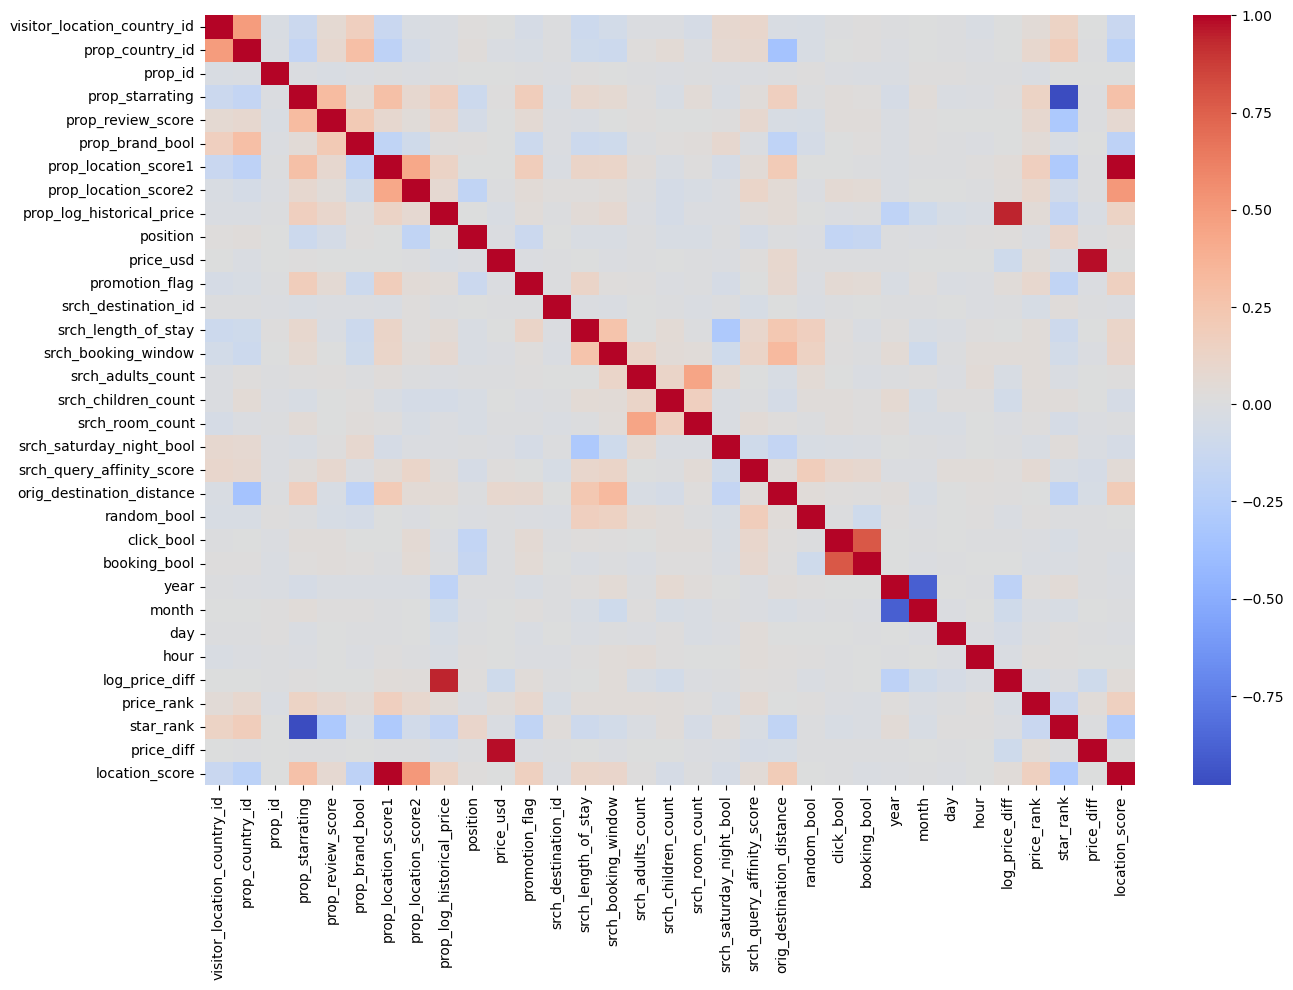

In [23]:
# Visualize the correlation between features
# Create a correlation matrix
corr = data.corr()
# Set up the plot
fig, ax = plt.subplots(figsize=(15, 10))
# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', ax=ax)
# Show the plot
plt.show()